In [1]:
import keras
import tensorflow as tf
print(keras.__version__)

Using TensorFlow backend.


2.3.1


In [2]:
IMG_SIZE = 224

In [3]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [4]:
vgg16 = tf.keras.applications.VGG16(
    input_shape = IMG_SHAPE,
    include_top=False,
    weights="imagenet")
vgg16.trainable=False

vgg19 = tf.keras.applications.VGG19(
    include_top=False,
    input_shape = IMG_SHAPE,
    weights="imagenet")
vgg19.trainable=False

resNet50 = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape = IMG_SHAPE,
    weights="imagenet")
resNet50.trainable=False

inceptionResNetV2 = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet")
inceptionResNetV2.trainable=False

Xception = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet")
Xception.trainable=False

In [5]:
flatten_layer = tf.keras.layers.Flatten()
dense_layer = tf.keras.layers.Dense(128,activation='relu')
dropout_layer = tf.keras.layers.Dropout(0.5)
prediction_layer = tf.keras.layers.Dense(10,activation='softmax')

In [6]:
resNet50_model = tf.keras.Sequential([
  resNet50,
  flatten_layer,
  dropout_layer,
  dense_layer,
  prediction_layer
])

In [7]:
learning_rate = 0.00001
resNet50_model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["accuracy"])
resNet50_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dropout (Dropout)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 36,434,186
Trainable params: 12,846,474
Non-trainable params: 23,587,712
_________________________________________________________________


In [9]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        r'D:\BigDataScience\Dataset\archive\Tobacco3482-jpg\Balanced_train',
        target_size=(224, 224),
        batch_size=16)
test_generator = test_datagen.flow_from_directory(
        r'D:\BigDataScience\Dataset\archive\Tobacco3482-jpg\Balanced_test',
        target_size=(224, 224),
        batch_size=16)

Found 1909 images belonging to 10 classes.
Found 269 images belonging to 10 classes.


In [10]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [11]:
resNet50_history = resNet50_model.fit(train_generator,
                    epochs=50, 
                    steps_per_epoch =1909/16,
                    validation_steps=269/16,
                    validation_data=test_generator)

Epoch 1/50
120/119 [==============================] - 61s 510ms/step - loss: 2.3830 - accuracy: 0.1807 - val_loss: 1.9475 - val_accuracy: 0.2677
Epoch 2/50
120/119 [==============================] - 60s 501ms/step - loss: 2.0662 - accuracy: 0.2535 - val_loss: 1.7827 - val_accuracy: 0.3160
Epoch 3/50
120/119 [==============================] - 60s 503ms/step - loss: 1.9228 - accuracy: 0.2975 - val_loss: 1.6704 - val_accuracy: 0.4164
Epoch 4/50
120/119 [==============================] - 61s 506ms/step - loss: 1.8203 - accuracy: 0.3373 - val_loss: 1.6680 - val_accuracy: 0.3717
Epoch 5/50
120/119 [==============================] - 61s 506ms/step - loss: 1.7335 - accuracy: 0.3709 - val_loss: 1.5949 - val_accuracy: 0.4349
Epoch 6/50
120/119 [==============================] - 60s 503ms/step - loss: 1.6788 - accuracy: 0.3976 - val_loss: 1.4891 - val_accuracy: 0.5093
Epoch 7/50
120/119 [==============================] - 61s 506ms/step - loss: 1.6440 - accuracy: 0.3986 - val_loss: 1.4442 - val_ac

In [12]:
resNet50_model.save('resNet50_model.h5')

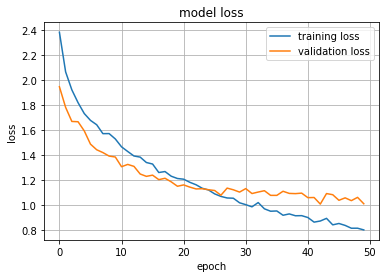

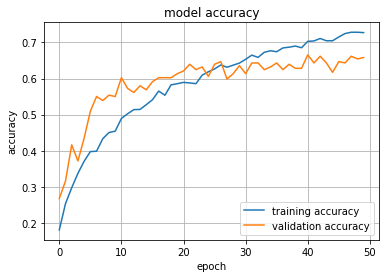

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.plot(resNet50_history.history['loss'])
plt.plot(resNet50_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

plt.plot(resNet50_history.history['accuracy'])
plt.plot(resNet50_history.history['val_accuracy'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()